In [47]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from pandas.util import hash_pandas_object

pd.set_option('display.max_columns', None)

## LOADING DATASET

In [48]:
#Importing both datasets
training_data=pd.read_csv("fraudTrain.csv")
testing_data=pd.read_csv("fraudTest.csv")

## Merging both Training and Testing Datasets

In [49]:
#checking whether both datasets have same data?
def match_dataframe_columns(df_train, df_test):
    try:
        return(all(df_train.columns == df_test.columns))
    except:
        return(False)

In [50]:
match_dataframe_columns(training_data, testing_data)

True

In [51]:
#Combining/appending both the datasets into a single dataset
fraud_data = pd.concat([training_data, testing_data], ignore_index=False)

In [52]:
fraud_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [53]:
fraud_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,MO,63453,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,ID,83643,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [54]:
fraud_data.info()
fraud_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## DATA CLEANING

In [55]:
#data cleaning
print(fraud_data.isnull())

        Unnamed: 0  trans_date_trans_time  cc_num  merchant  category    amt  \
0            False                  False   False     False     False  False   
1            False                  False   False     False     False  False   
2            False                  False   False     False     False  False   
3            False                  False   False     False     False  False   
4            False                  False   False     False     False  False   
...            ...                    ...     ...       ...       ...    ...   
555714       False                  False   False     False     False  False   
555715       False                  False   False     False     False  False   
555716       False                  False   False     False     False  False   
555717       False                  False   False     False     False  False   
555718       False                  False   False     False     False  False   

        first   last  gender  street   

In [60]:
fraud_data.describe()
fraud_data.drop(columns=['Unnamed: 0'], inplace=True)

In [61]:
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4904204149027222506,30.815144
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,3946690872736109954,40.531977
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,17589267391949273797,56.951205
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,4670342444137980461,51.970953
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,8131892023927108686,32.764539


In [62]:
from pandas.util import hash_pandas_object

pd.set_option('display.max_columns', None)

In [63]:
# Create a hash of the person's full name
fraud_data['hash_name'] = hash_pandas_object(fraud_data['first'] + ' ' + fraud_data['last'])

# Convert transaction date and birth date to datetime objects
transaction_date = pd.to_datetime(fraud_data['trans_date_trans_time'])
birth_date = pd.to_datetime(fraud_data['dob'])

# Calculate the age of each person in years
year_timedelta = np.timedelta64(1, 'Y')
fraud_data['age_years'] = (transaction_date - birth_date) / year_timedelta

In [64]:
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4904204149027222506,30.815144
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,3946690872736109954,40.531977
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,17589267391949273797,56.951205
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,4670342444137980461,51.970953
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,8131892023927108686,32.764539


## Exploratory Data Analysis

In [65]:

#1= HANDLING DUPES
duplicate_rows_data = fraud_data[fraud_data.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 24)


In [66]:
fraud_data.drop_duplicates(subset=['first', 'last'], inplace=True)


In [67]:
print("Number of duplicated rows: ", duplicate_rows_data.shape)

Number of duplicated rows:  (0, 24)


In [68]:
for column in fraud_data.columns:
    num_distinct_values = len(fraud_data[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

trans_date_trans_time: 983 distinct values
cc_num: 989 distinct values
merchant: 464 distinct values
category: 14 distinct values
amt: 957 distinct values
first: 355 distinct values
last: 486 distinct values
gender: 2 distinct values
street: 989 distinct values
city: 898 distinct values
state: 50 distinct values
zip: 975 distinct values
lat: 973 distinct values
long: 973 distinct values
city_pop: 882 distinct values
job: 496 distinct values
dob: 974 distinct values
trans_num: 989 distinct values
unix_time: 983 distinct values
merch_lat: 989 distinct values
merch_long: 989 distinct values
is_fraud: 2 distinct values
hash_name: 989 distinct values
age_years: 989 distinct values


In [69]:
fraud_data.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
hash_name                0
age_years                0
dtype: int64

In [72]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00
mean,416272130304010112.00,94.24,48705.63,38.60,-90.25,99935.08,1327931641.61,38.60,-90.26,0.09,9334226730510381056.00,48.71
std,1303478754418528000.00,159.24,26991.35,5.11,14.10,322348.24,9678837.39,5.14,14.13,0.28,5273805849742652416.00,18.56
min,60416207185.00,1.03,1257.00,20.03,-165.67,23.00,1325376018.00,19.21,-166.15,0.00,10453862225973654.00,13.92
25%,180031190491743.00,13.50,26237.00,34.87,-96.75,824.00,1325390047.00,34.89,-96.69,0.00,4835389506739924992.00,33.34
50%,3523898249167098.00,56.35,47863.00,39.40,-87.46,3224.00,1325412855.00,39.34,-87.41,0.00,9226238621580906496.00,47.41
75%,4651007077623147.00,95.82,71832.00,41.95,-80.16,23045.00,1325450151.00,41.90,-80.09,0.00,13590047588493060096.00,61.02
max,4992346398065154048.00,1433.54,99921.00,66.69,-67.95,2906700.00,1387596548.00,67.06,-68.52,1.00,18435048609283596288.00,94.18


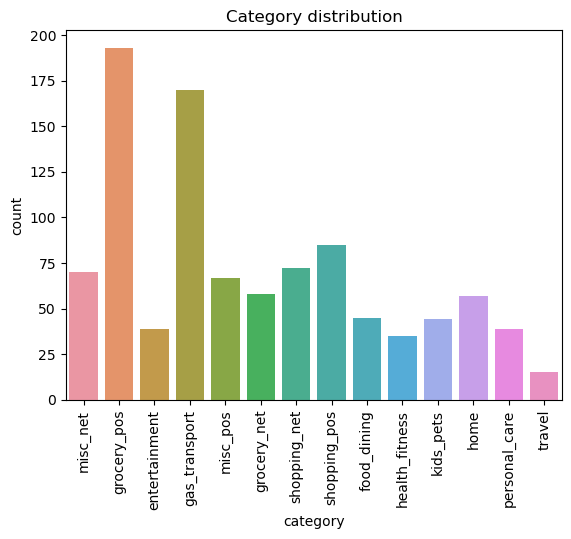

In [74]:
sns.countplot(x='category', data=fraud_data)
plt.title('Category distribution')
plt.xticks(rotation=90)
plt.show()

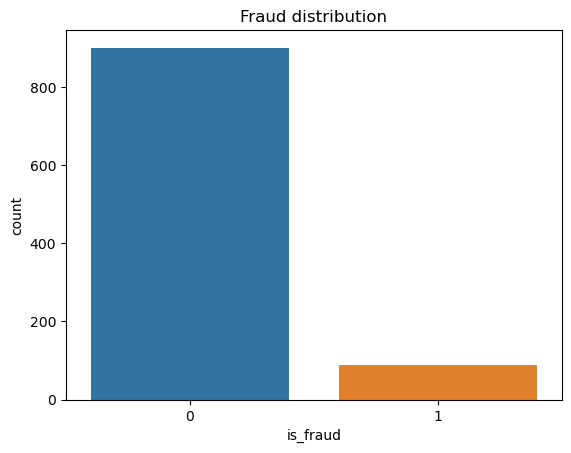

In [79]:
sns.countplot(x='is_fraud', data=fraud_data)
plt.title('Fraud distribution')
plt.show()

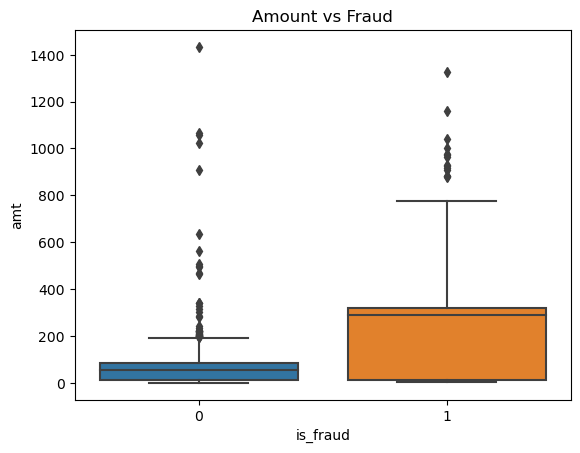

In [80]:
sns.boxplot(x='is_fraud', y='amt', data=fraud_data)
plt.title("Amount vs Fraud")
plt.show()

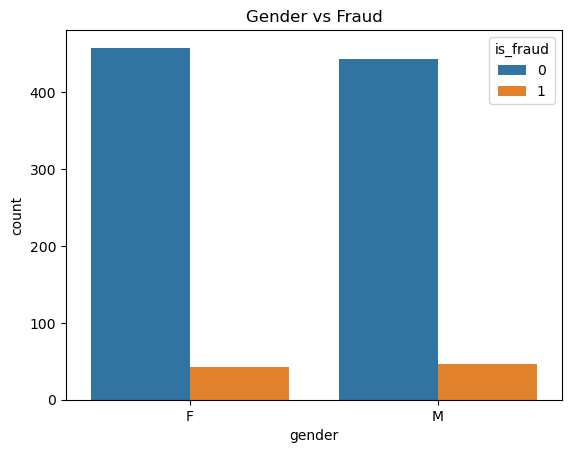

In [81]:
sns.countplot(x='gender', hue='is_fraud', data=fraud_data)
plt.title("Gender vs Fraud")
plt.show()

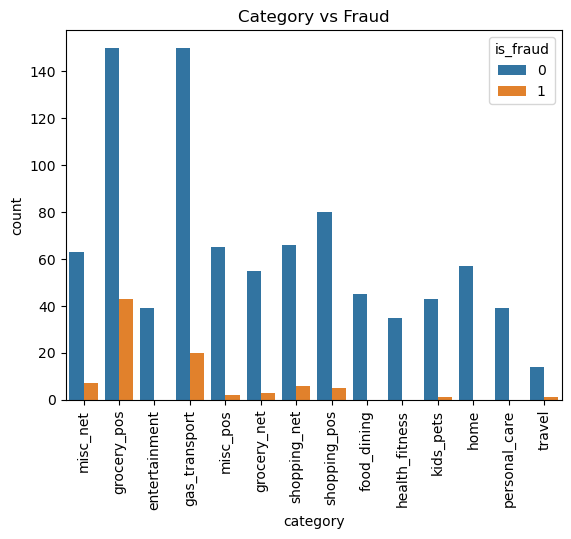

In [82]:
sns.countplot(x='category', hue='is_fraud', data=fraud_data)
plt.title("Category vs Fraud")
plt.xticks(rotation=90)
plt.show()

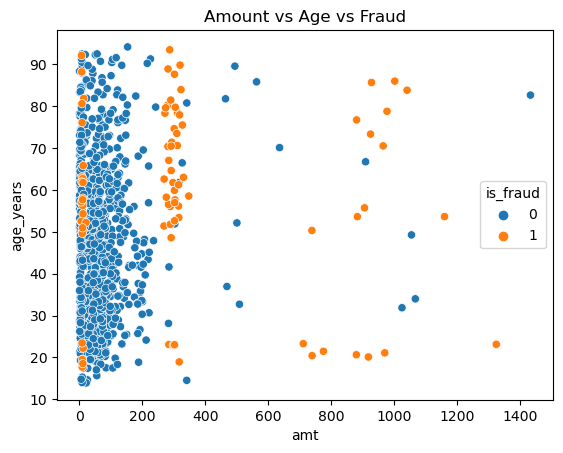

In [83]:
sns.scatterplot(data=fraud_data, x='amt', y='age_years', hue='is_fraud')
plt.title('Amount vs Age vs Fraud')
plt.show()

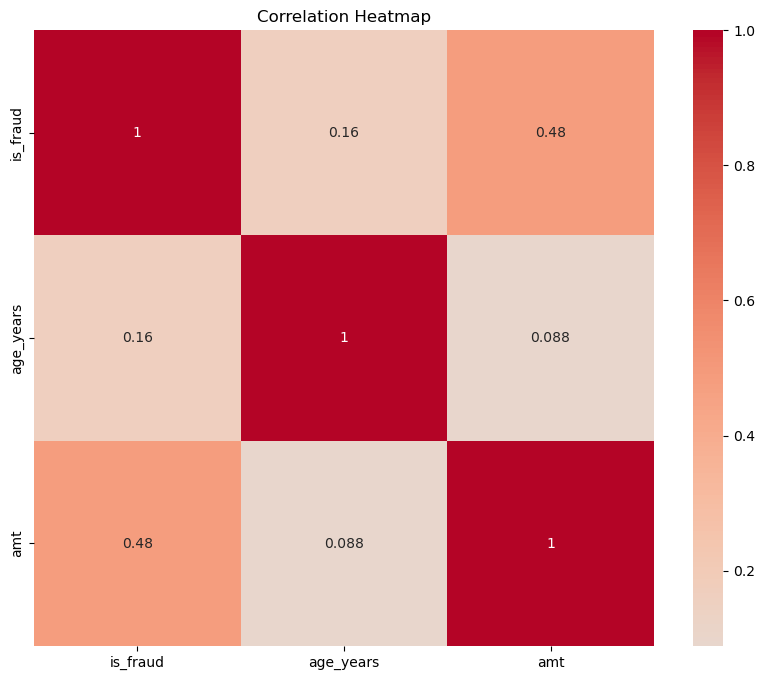

In [89]:
correlation_matrix = fraud_data[['is_fraud', 'age_years', 'amt']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


In [96]:
fraud_data.dropna(inplace=True)

In [97]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,9.890000e+02,989.000000,989.000000,989.000000,989.000000,9.890000e+02,9.890000e+02,989.000000,989.000000,989.000000,9.890000e+02,989.000000
mean,4.162721e+17,94.240546,48705.626896,38.601149,-90.246668,9.993508e+04,1.327932e+09,38.595959,-90.260453,0.088979,9.334227e+18,48.707944
std,1.303479e+18,159.235086,26991.349348,5.111935,14.100402,3.223482e+05,9.678837e+06,5.140116,14.125167,0.284857,5.273806e+18,18.564606
min,6.041621e+10,1.030000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.209212,-166.148374,0.000000,1.045386e+16,13.922618
25%,1.800312e+14,13.500000,26237.000000,34.869800,-96.745600,8.240000e+02,1.325390e+09,34.893652,-96.689819,0.000000,4.835390e+18,33.337019
50%,3.523898e+15,56.350000,47863.000000,39.401500,-87.456900,3.224000e+03,1.325413e+09,39.335171,-87.409615,0.000000,9.226239e+18,47.410705
75%,4.651007e+15,95.820000,71832.000000,41.948800,-80.162900,2.304500e+04,1.325450e+09,41.903320,-80.091423,0.000000,1.359005e+19,61.019418
max,4.992346e+18,1433.540000,99921.000000,66.693300,-67.950300,2.906700e+06,1.387597e+09,67.064277,-68.523008,1.000000,1.843505e+19,94.183579


In [98]:
fraud_data.describe().style.format('{:.2f}')

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hash_name,age_years
count,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00,989.00
mean,416272130304010112.00,94.24,48705.63,38.60,-90.25,99935.08,1327931641.61,38.60,-90.26,0.09,9334226730510381056.00,48.71
std,1303478754418528000.00,159.24,26991.35,5.11,14.10,322348.24,9678837.39,5.14,14.13,0.28,5273805849742652416.00,18.56
min,60416207185.00,1.03,1257.00,20.03,-165.67,23.00,1325376018.00,19.21,-166.15,0.00,10453862225973654.00,13.92
25%,180031190491743.00,13.50,26237.00,34.87,-96.75,824.00,1325390047.00,34.89,-96.69,0.00,4835389506739924992.00,33.34
50%,3523898249167098.00,56.35,47863.00,39.40,-87.46,3224.00,1325412855.00,39.34,-87.41,0.00,9226238621580906496.00,47.41
75%,4651007077623147.00,95.82,71832.00,41.95,-80.16,23045.00,1325450151.00,41.90,-80.09,0.00,13590047588493060096.00,61.02
max,4992346398065154048.00,1433.54,99921.00,66.69,-67.95,2906700.00,1387596548.00,67.06,-68.52,1.00,18435048609283596288.00,94.18


## MODEL BUILDING 

In [104]:
#by using logistic regression 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model with increased max_iter
logreg = LogisticRegression(random_state=42, max_iter=1000, solver='lbfgs')

# Train the model
logreg.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9696969696969697
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       179
           1       1.00      0.68      0.81        19

    accuracy                           0.97       198
   macro avg       0.98      0.84      0.90       198
weighted avg       0.97      0.97      0.97       198

Confusion Matrix:
 [[179   0]
 [  6  13]]


In [105]:
#by using SVM
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Support Vector Machine (SVM) model
svm = SVC(kernel='linear', random_state=42)

# Train the model
svm.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.9848484848484849
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       179
           1       1.00      0.84      0.91        19

    accuracy                           0.98       198
   macro avg       0.99      0.92      0.95       198
weighted avg       0.99      0.98      0.98       198

Confusion Matrix:
 [[179   0]
 [  3  16]]


In [111]:
#using random forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define features and target variable
X = fraud_data[['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'age_years']]
y = fraud_data['is_fraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", confusion)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9949494949494949
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       179
           1       1.00      0.95      0.97        19

    accuracy                           0.99       198
   macro avg       1.00      0.97      0.99       198
weighted avg       0.99      0.99      0.99       198

Confusion Matrix:
 [[179   0]
 [  1  18]]
